In [1]:
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
from PIL import Image
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

path = r"F:\PROJECTS\AI non github\new"
print("Files and directories in a specified path:")
for dirname in os.listdir(path):
    dirpath = os.path.join(path, dirname)
    print(dirpath)
    for filename in os.listdir(dirpath):
        f = os.path.join(dirpath, filename)
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        image = cv2.imread(f)
        image = cv2.resize(image, (32, 32))
        data.append(image)

        # update label list
        labels.append(dirname)
        
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...
Files and directories in a specified path:
F:\PROJECTS\AI non github\new\seledri
F:\PROJECTS\AI non github\new\sirih
Time taken: 4.7 seconds
done


In [22]:
np.array(data).shape

(140, 32, 32, 3)

In [23]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=51)

In [24]:
print('Ukuran data train =', trainX.shape)
print('Ukuran data test =', testX.shape)

Ukuran data train = (112, 32, 32, 3)
Ukuran data test = (28, 32, 32, 3)


In [25]:
trainX

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [26]:
trainY

array(['seledri', 'sirih', 'sirih', 'seledri', 'sirih', 'seledri',
       'sirih', 'sirih', 'seledri', 'sirih', 'seledri', 'seledri',
       'sirih', 'sirih', 'sirih', 'seledri', 'seledri', 'seledri',
       'sirih', 'seledri', 'seledri', 'sirih', 'sirih', 'seledri',
       'sirih', 'sirih', 'sirih', 'sirih', 'seledri', 'seledri',
       'seledri', 'seledri', 'sirih', 'seledri', 'seledri', 'sirih',
       'sirih', 'seledri', 'sirih', 'seledri', 'seledri', 'seledri',
       'seledri', 'sirih', 'seledri', 'seledri', 'sirih', 'seledri',
       'seledri', 'seledri', 'seledri', 'seledri', 'seledri', 'seledri',
       'seledri', 'sirih', 'seledri', 'seledri', 'seledri', 'seledri',
       'seledri', 'seledri', 'sirih', 'sirih', 'sirih', 'seledri',
       'seledri', 'sirih', 'seledri', 'sirih', 'seledri', 'seledri',
       'seledri', 'seledri', 'seledri', 'seledri', 'sirih', 'sirih',
       'seledri', 'seledri', 'sirih', 'seledri', 'seledri', 'seledri',
       'seledri', 'sirih', 'seledri', 's

In [27]:
type(trainY)

numpy.ndarray

In [28]:
# convert the labels from integers/categories to vectors 
# (for 2-class, binary classification you should use Keras' to_categorical function instead)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = lb.transform(testY)         # transform = perform the one-hot encoding (unique class labels already found)

# This is the categorical vector after transformation
# [1, 0, 0] # corresponds to cat
# [0, 1, 0] # corresponds to dog
# [0, 0, 1] # corresponds to panda

In [29]:
trainY

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [30]:
model = Sequential()
# input Layer: 32 size x 32 size x 3 rgb pixels flattened
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(1024, activation="relu"))   # 1st hidden layer
model.add(Dense(512, activation="relu"))  # 2nd hidden layer
model.add(Dense(1, activation="sigmoid"))  # output layer

In [31]:
# hyperparameter setting
lr = 0.001
max_epochs = 60
opt_funct = Adam(learning_rate=lr)

In [32]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [33]:
times = time.time()
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
          epochs=max_epochs, batch_size=32)
print("Time taken: {:.1f} seconds".format(time.time() - times))

Epoch 1/60
4/4 [==============================] - 1s 102ms/step - loss: 6.0242 - accuracy: 0.5000 - val_loss: 3.7736 - val_accuracy: 0.6786
Epoch 2/60
4/4 [==============================] - 0s 37ms/step - loss: 2.8207 - accuracy: 0.5804 - val_loss: 1.7375 - val_accuracy: 0.3214
Epoch 3/60
4/4 [==============================] - 0s 34ms/step - loss: 1.1937 - accuracy: 0.5357 - val_loss: 0.8695 - val_accuracy: 0.6786
Epoch 4/60
4/4 [==============================] - 0s 37ms/step - loss: 0.7016 - accuracy: 0.6518 - val_loss: 0.8785 - val_accuracy: 0.3214
Epoch 5/60
4/4 [==============================] - 0s 36ms/step - loss: 0.7182 - accuracy: 0.5982 - val_loss: 0.6169 - val_accuracy: 0.6786
Epoch 6/60
4/4 [==============================] - 0s 36ms/step - loss: 0.6707 - accuracy: 0.6607 - val_loss: 0.5113 - val_accuracy: 0.9286
Epoch 7/60
4/4 [==============================] - 0s 35ms/step - loss: 0.4752 - accuracy: 0.7589 - val_loss: 0.4644 - val_accuracy: 0.6786
Epoch 8/60
4/4 [==========

4/4 [==============================] - 0s 38ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9643
Epoch 60/60
4/4 [==============================] - 0s 34ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9643
Time taken: 8.8 seconds


In [34]:
label_list = ['sirih', 'seledri']

# check acccuracy model for data test
predictions = model.predict(testX, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(testY, target, target_names=label_list))

              precision    recall  f1-score   support

       sirih       0.95      1.00      0.97        19
     seledri       1.00      0.89      0.94         9

    accuracy                           0.96        28
   macro avg       0.97      0.94      0.96        28
weighted avg       0.97      0.96      0.96        28



<ipython-input-34-71726cdc38c6>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


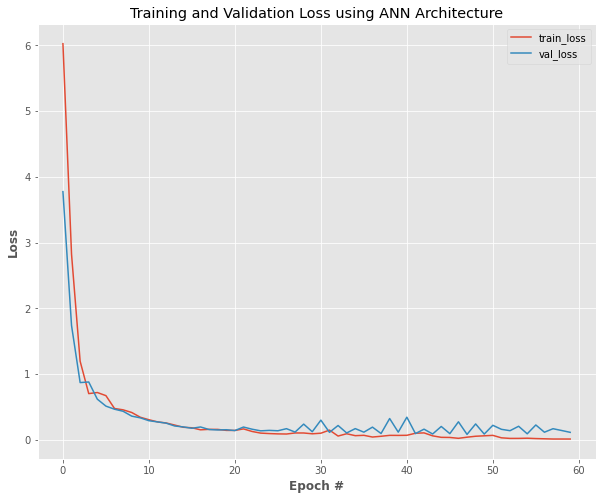

In [35]:
# Plot Training and Validation Loss

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss using ANN Architecture")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

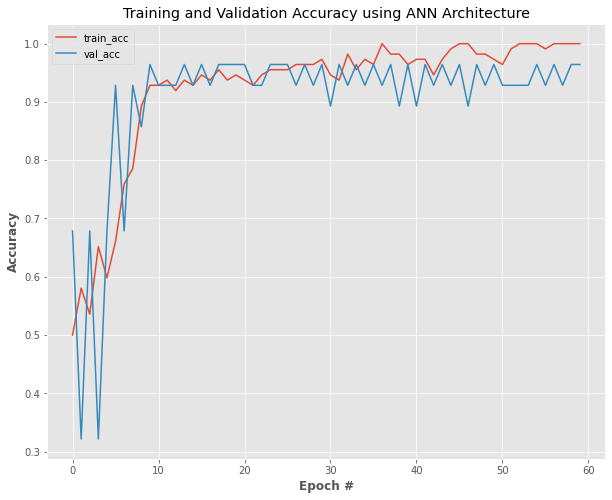

In [36]:
# Plot Training and Validation Accuracy

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy using ANN Architecture")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 3,672,065
Trainable params: 3,672,065
Non-trainable params: 0
_________________________________________________________________


In [38]:
import pickle

In [39]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('daun_sirih_seledri_model.h5')
f = open('daun_sirih_seledri_model', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...
